In [611]:
# explore the data before you start building the complex models 

In [612]:
# !pip install pandas

In [613]:
import pandas as pd

In [614]:
pd.set_option('display.max_columns', 500)

In [615]:
csv_url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [616]:
df = pd.read_csv(csv_url, header=None)

In [617]:
csv_custom_headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compress-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [618]:
df.columns = csv_custom_headers

In [619]:
df.head(6)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   
5        sedan          fwd           front        99.8   177.3   66.3   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   
5    53.1         2507         ohc             five          136        mpfi   

   bore stroke  compress-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68             9.0        111     5000        21           27   
1  3.47   2.68             9.0        111     5000        21           27   
2  2.68   3.47             9.0        154     5000        19           26   
3  3.19   3.40            10.0        102     5500        24           30   
4  3.19   3.40             8.0        115     5500        18           22   
5  3.19   3.40             8.5        110     5500        19           25   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450  
5  15250

In [620]:
df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compress-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000      205.000000  205.000000   205.000000  
mean   2555.565854   126.907317       10.142537   25.219512    30.751220  
std     520.680204    41.642693        3.972040    6.542142     6.886443  
min    1488.000000    61.000000        7.000000   13.000000    16.000000  
25%    2145.000000    97.000000        8.600000   19.000000    25.000000  
50%    2414.000000   120.000000        9.000000   24.000000    30.000000  
75%    2935.000000   141.000000        9.400000   30.000000    34.000000  
max    4066.000000   326.000000       23.000000   49.000000    54.000000

In [621]:
# summarize the categorical data

In [622]:
df["drive-wheels"].head()

0    rwd
1    rwd
2    rwd
3    fwd
4    4wd
Name: drive-wheels, dtype: object

In [623]:
count_by_drive_wheels = df["drive-wheels"].value_counts()

In [624]:
count_by_drive_wheels

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [625]:
count_by_drive_wheels.rename(coulmns={'drive-wheels':'value_counts'}, inplace=True)

fwd    120
rwd     76
4wd      9
dtype: int64

In [626]:
count_by_drive_wheels.index.name = 'drive-wheels'

In [627]:
count_by_drive_wheels

drive-wheels
fwd    120
rwd     76
4wd      9
dtype: int64

In [628]:
# Box Plots : shows are the median of the data, which represents where the middle data point is. The upper quartile shows where the 75th percentile is. The lower quartile shows where the 25th percentile is. The data between the upper and lower quartile represents the interquartile range. Next, you have the lower and upper extremes. These are calculated as 1.5 times the interquartile range above the 75th percentile and as 1.5 times the IQR below the 25th percentile. Finally, box plots also display outliers as individual dots that occur outside the upper and lower extremes.

In [629]:
# !pip install seaborn

In [630]:
import seaborn as sns

In [631]:
df["price"].head(11)

0     13495
1     16500
2     16500
3     13950
4     17450
5     15250
6     17710
7     18920
8     23875
9         ?
10    16430
Name: price, dtype: object

In [632]:
df = df[~df.price.str.contains("?", regex=False)] # or escape ? with /

In [633]:
df.dropna(subset=["price"], axis=0, inplace=True)

In [634]:
df.head(11)

symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           3                 ?  alfa-romero       gas        std   
2           1                 ?  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   
5           2                 ?         audi       gas        std   
6           1               158         audi       gas        std   
7           1                 ?         audi       gas        std   
8           1               158         audi       gas      turbo   
10          2               192          bmw       gas        std   
11          0               192          bmw       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0           two  convertible          rwd           front        88.6   168.8   
1           two  convertible          rwd           front        88.6   168.8   
2           two    hatchback          rwd           front        94.5   171.2   
3          four        sedan          fwd           front        99.8   176.6   
4          four        sedan          4wd           front        99.4   176.6   
5           two        sedan          fwd           front        99.8   177.3   
6          four        sedan          fwd           front       105.8   192.7   
7          four        wagon          fwd           front       105.8   192.7   
8          four        sedan          fwd           front       105.8   192.7   
10          two        sedan          rwd           front       101.2   176.8   
11         four        sedan          rwd           front       101.2   176.8   

    width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0    64.1    48.8         2548        dohc             four          130   
1    64.1    48.8         2548        dohc             four          130   
2    65.5    52.4         2823        ohcv              six          152   
3    66.2    54.3         2337         ohc             four          109   
4    66.4    54.3         2824         ohc             five          136   
5    66.3    53.1         2507         ohc             five          136   
6    71.4    55.7         2844         ohc             five          136   
7    71.4    55.7         2954         ohc             five          136   
8    71.4    55.9         3086         ohc             five          131   
10   64.8    54.3         2395         ohc             four          108   
11   64.8    54.3         2395         ohc             four          108   

   fuel-system  bore stroke  compress-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47   2.68             9.0        111     5000        21   
1         mpfi  3.47   2.68             9.0        111     5000        21   
2         mpfi  2.68   3.47             9.0        154     5000        19   
3         mpfi  3.19   3.40            10.0        102     5500        24   
4         mpfi  3.19   3.40             8.0        115     5500        18   
5         mpfi  3.19   3.40             8.5        110     5500        19   
6         mpfi  3.19   3.40             8.5        110     5500        19   
7         mpfi  3.19   3.40             8.5        110     5500        19   
8         mpfi  3.13   3.40             8.3        140     5500        17   
10        mpfi  3.50   2.80             8.8        101     5800        23   
11        mpfi  3.50   2.80             8.8        101     5800        23   

    highway-mpg  price  
0            27  13495  
1            27  16500  
2            26  16500  
3            30  13950  
4            22  17450  
5            25  15250  
6            25  17710  
7            25  18920  
8            20  23875  
10           29  16430  
11           29  16925

In [635]:
df["price"] = df["price"].astype("int")

In [636]:
df["price"].head(10)

0     13495
1     16500
2     16500
3     13950
4     17450
5     15250
6     17710
7     18920
8     23875
10    16430
Name: price, dtype: int64

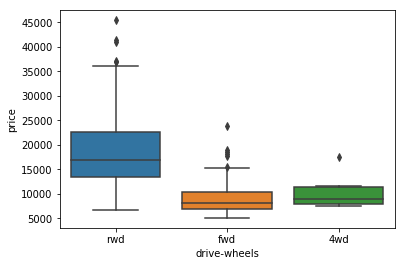

In [637]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [638]:
# plt.show() # not required here

In [639]:
# Scatter plot : price and engine size are cntinuous variables. So is the engine size helps to predict the price? So understading the relationship between engine size and price is very important. Here the predictor variable(x-axis) is engine size and target variable(y-axis) is the price

In [640]:
import matplotlib.pyplot as plt

In [641]:
x=df["engine-size"]

In [642]:
y=df["price"]

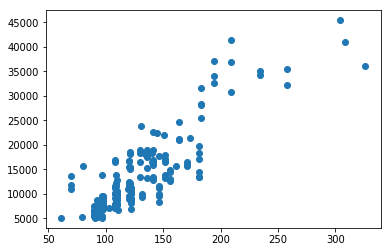

In [643]:
plt.scatter(x, y)

Text(0.5,1,'Scatterplot of Engine size vs Price')

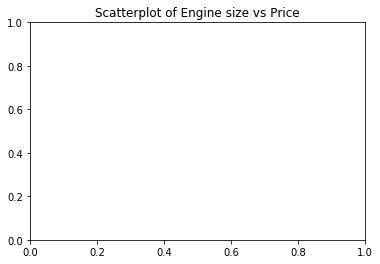

In [644]:
plt.title("Scatterplot of Engine size vs Price")

Text(0.5,0,'Engine Size')

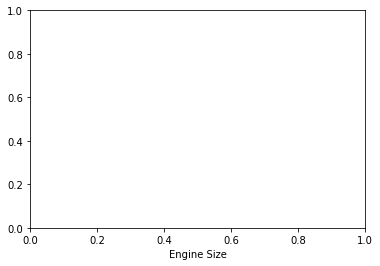

In [645]:
plt.xlabel("Engine Size")

Text(0,0.5,'Price')

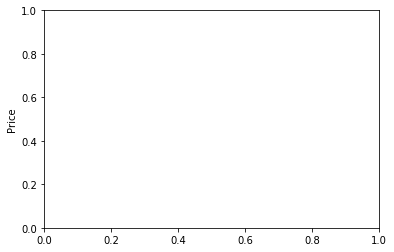

In [646]:
plt.ylabel("Price")

In [647]:
# plt.legend()

In [648]:
plt.show()